# Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста

В крупном интернет-магазине подготовлен список гипотез для увеличения выручки. 

### Задачи проекта: приоритизация гипотез, запуск A/B-теста и анализ результатов.

#### Часть 1. Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

#### Часть 2. Анализ A/B-теста

Получены результаты A/B-теста, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

## Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Изучение данных из файла и предобработка

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings

In [2]:
# настроим параметры визуализации

sns.set(
    font_scale =2,
    style      ='whitegrid',
    rc         ={'figure.figsize':(20,7)}
)
%config InlineBackend.figure_format = 'retina'

In [3]:
# откорем датасет 
# настроим расширение для отображения ячеек таблицы

try:
    hypothesis = pd.read_csv(r'D:\datasets/hypothesis.csv')
except: 
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 150) 

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# применим функцию необходимую для первичного анализа

def description(x):
    display('Получение общей информации о данных в таблице')
    display(x.info())
    display('Подсчёт пропусков в таблице')
    display(x.isna().sum())
    display('Статистические показатели таблицы')
    display(x.describe())
    display('Количество строк и столбцов')
    display(x.shape)
    display('Наличие дубликатов в таблице')
    display(x.duplicated().sum())
# приводим названия столбцов к нижнему регистру
    x.columns = [a.lower() for a in x.columns]

In [5]:
# посмотрим описание

description(hypothesis)

'Получение общей информации о данных в таблице'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

'Подсчёт пропусков в таблице'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'Статистические показатели таблицы'

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


'Количество строк и столбцов'

(9, 5)

'Наличие дубликатов в таблице'

0

### Промежуточный вывод

Датасет 'hypothesis' содержит девять гипотез с колонками:
* Hypothesis — краткое описание гипотезы;
* Reach — пользовательский охват по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затратность ресурсов на проверку гипотезы по 10-балльной шкале. Чем выше Efforts тем дороже проверка гипотезы.

Для удобства работы с датасетом приведем названия колонок к нижнему регистру. 

### Применение фреймворка ICE для приоритизации гипотез. Сортировка по убыванию приоритета.

In [6]:
hypothesis['ICE'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Применение фреймворка  RICE для приоритизации гипотез. Сортировка по убыванию приоритета.

In [7]:
hypothesis['RICE'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Промежуточный вывод

Гипотезы обладающие наиболее высокой перспективой по ICE:
* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Гипотезы обладающие наиболее высокой перспективой по RICE:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
* Запустить акцию, дающую скидку на товар в день рождения
Исходя из того что RICE включает в себя  параметр ('Reach'), именно он оказал влияние на приоритет гипотез.

Первые пять гипотез совпадают у ICE и RICE, но имеют разную последовательность. 
Гипотеза по ICE занявшая первое место: "Запустить акцию, дающую скидку на товар в день рождения" заняла пятое место по RICE, исходя из того что она обладает самым низким охватом (1 балл). Видимо потому что данная акция доступна пользователям раз в год, что ограничивает возможность ее применения.

Кроме этого гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" поднялась с третьего на первое место, так как затрагивает большинство пользователей. Охват гипотезы 10 баллов.

Гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" поднялась на второе место с пятого аналогично за счет высокого балла по охвату 8 баллов.

Наиболее приоритетными являются гипотезы фреймворка RICE, набравшие наибольшее количество баллов. 
Рекомендуется их использовать при проведении A/B-теста.

## Анализ A/B-теста

Получены результаты A/B-теста, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

### Изучение данных из файла и предобработка

In [8]:
# откорем датасет orders 

try:
    orders = pd.read_csv(r'D:\datasets/orders.csv')
except: 
    orders = pd.read_csv('/datasets/orders.csv')
    
# выведем первые 10 строк

orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
# откорем датасет orders 

try:
    visitors = pd.read_csv(r'D:\datasets/visitors.csv')
except: 
    visitors = pd.read_csv('/datasets/visitors.csv')

# выведем первые 10 строк
    
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [10]:
# применим функцию для первичного анализа

def description(x, y):
    display('Получение общей информации о данных в таблицах')
    display(x.info())
    display(y.info())
    display('Статистические показатели таблиц')
    display(x.describe())
    display(y.describe())
    display('Количество строк и столбцов')
    display(x.shape)
    display(y.shape)
    display('Наличие дубликатов в таблице')
    display(x.duplicated().sum())
    display(y.duplicated().sum())

In [11]:
# выведем описание

description(orders, visitors)

'Получение общей информации о данных в таблицах'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'Статистические показатели таблиц'

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


'Количество строк и столбцов'

(1197, 5)

(62, 3)

'Наличие дубликатов в таблице'

0

0

In [12]:
# преобразуем строки в дату

def to_date(x):
    x['date'] = pd.to_datetime(x['date'])

to_date(orders)
to_date(visitors)

In [13]:
# Применим функцию определения минимальной и максимальной даты

def dates(x):
    display(x.date.min())
    display(x.date.max())

In [14]:
# отобразим минимальную и максимальную дату

dates(orders)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [15]:
# минимальная и максимальная дата
dates(visitors)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [16]:
# рассчитаем общее количество заказов в двух группах

orders.groupby('group').agg({'transactionId' : 'count'})

,transactionId
group,
A,557
B,640


In [17]:
# рассчитаем общее количество уникальных пользователей в двух группах

orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,503
B,586


In [18]:
# выведем количество уникальных пользователей, которые присутствуют одновременно в двух группах

unique_visitors = orders.loc[:, ['visitorId', 'group']].drop_duplicates().drop(columns=['group'])
unique_visitors.visitorId.duplicated().sum()

58

### Промежуточный вывод

Датасет 'orders' присутствует 1197 строк и содержатся следующие колонки:

*    transactionId — идентификатор заказа;
*    visitorId — идентификатор пользователя, совершившего заказ;
*    date — дата, когда был совершён заказ;
*    revenue — выручка заказа;
*    group — группа A/B-теста, в которую попал заказ.

Датасет 'orders' присутствует 62 строки и содержатся следующие колонки:

*    date — дата;
*    group — группа A/B-теста;
*    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Проанализировав общую информацию полученнцю из датасетов можно сделать вывод, что данные в колонках с датами имеют тип "object" они были преобразованы в "datetime64".

В датасете orders минимальная выручка заказа составила 50 ед., максимальная - 1 294 500 ед. Средняя выручка - 8 348,01 ед., медианная - 2 978 ед.

В датасете visitors количество пользователей за день в группе A/B-теста варьировалось от 361 до 770. Среднее число - 607,29, медиана - 624,5.

Минимальная и максимальная дата в двух таблицах совпадает - 1 августа 2019 г. и 31 августа 2019 г. соответственно. 
Даты будут необходымы для построения графиков.

Дубликаты в таблицах не  были выявлены.

Общее количество заказов в группах не совпадает. В группе А зафиксировано 557 заказов, в группе В - 640. 
Сравнение уникальных пользователей также выявило различия. 
В группе В на 83 уникальных пользователя больше.
Кроме этого, в группе А и группе В оказалось 58 пользователей единовременно.
Количество пользователей в различных группах не должно превышать 1% для успешного проведения теста. 
Некорректное деление трафика теста влияет на качество проведения анализа. 

### Создание графика кумулятивной выручки по группам.

In [19]:
# подключаем конверторы, позволяющие использовать типы pandas в matplotlib  

register_matplotlib_converters()

In [20]:
# создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders 
# удалим дубликаты

datesGroups = orders[['date', 'group']].drop_duplicates()


ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', # дата
            'group': 'max', # группа A/B-теста
            'transactionId': 'nunique', # число уникальных заказов в группе теста по указанную дату включительно
            'visitorId': 'nunique', # число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста
            'revenue': 'sum', # суммарная выручка заказов в группе теста по указанную дату включительно
        }
    ),
    axis=1,
).sort_values(by=['date', 'group']) # сортировка по столбцам 'date', 'group'


visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# определение  переменной по колонкам 'date', 'group' методом merge()

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# присвоим столбцам cumulativeData названия

cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


# переменная с данными о датах, выручке и числе заказов в группе А

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]

# переменная с данными о датах, выручке и числе заказов в группе В

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

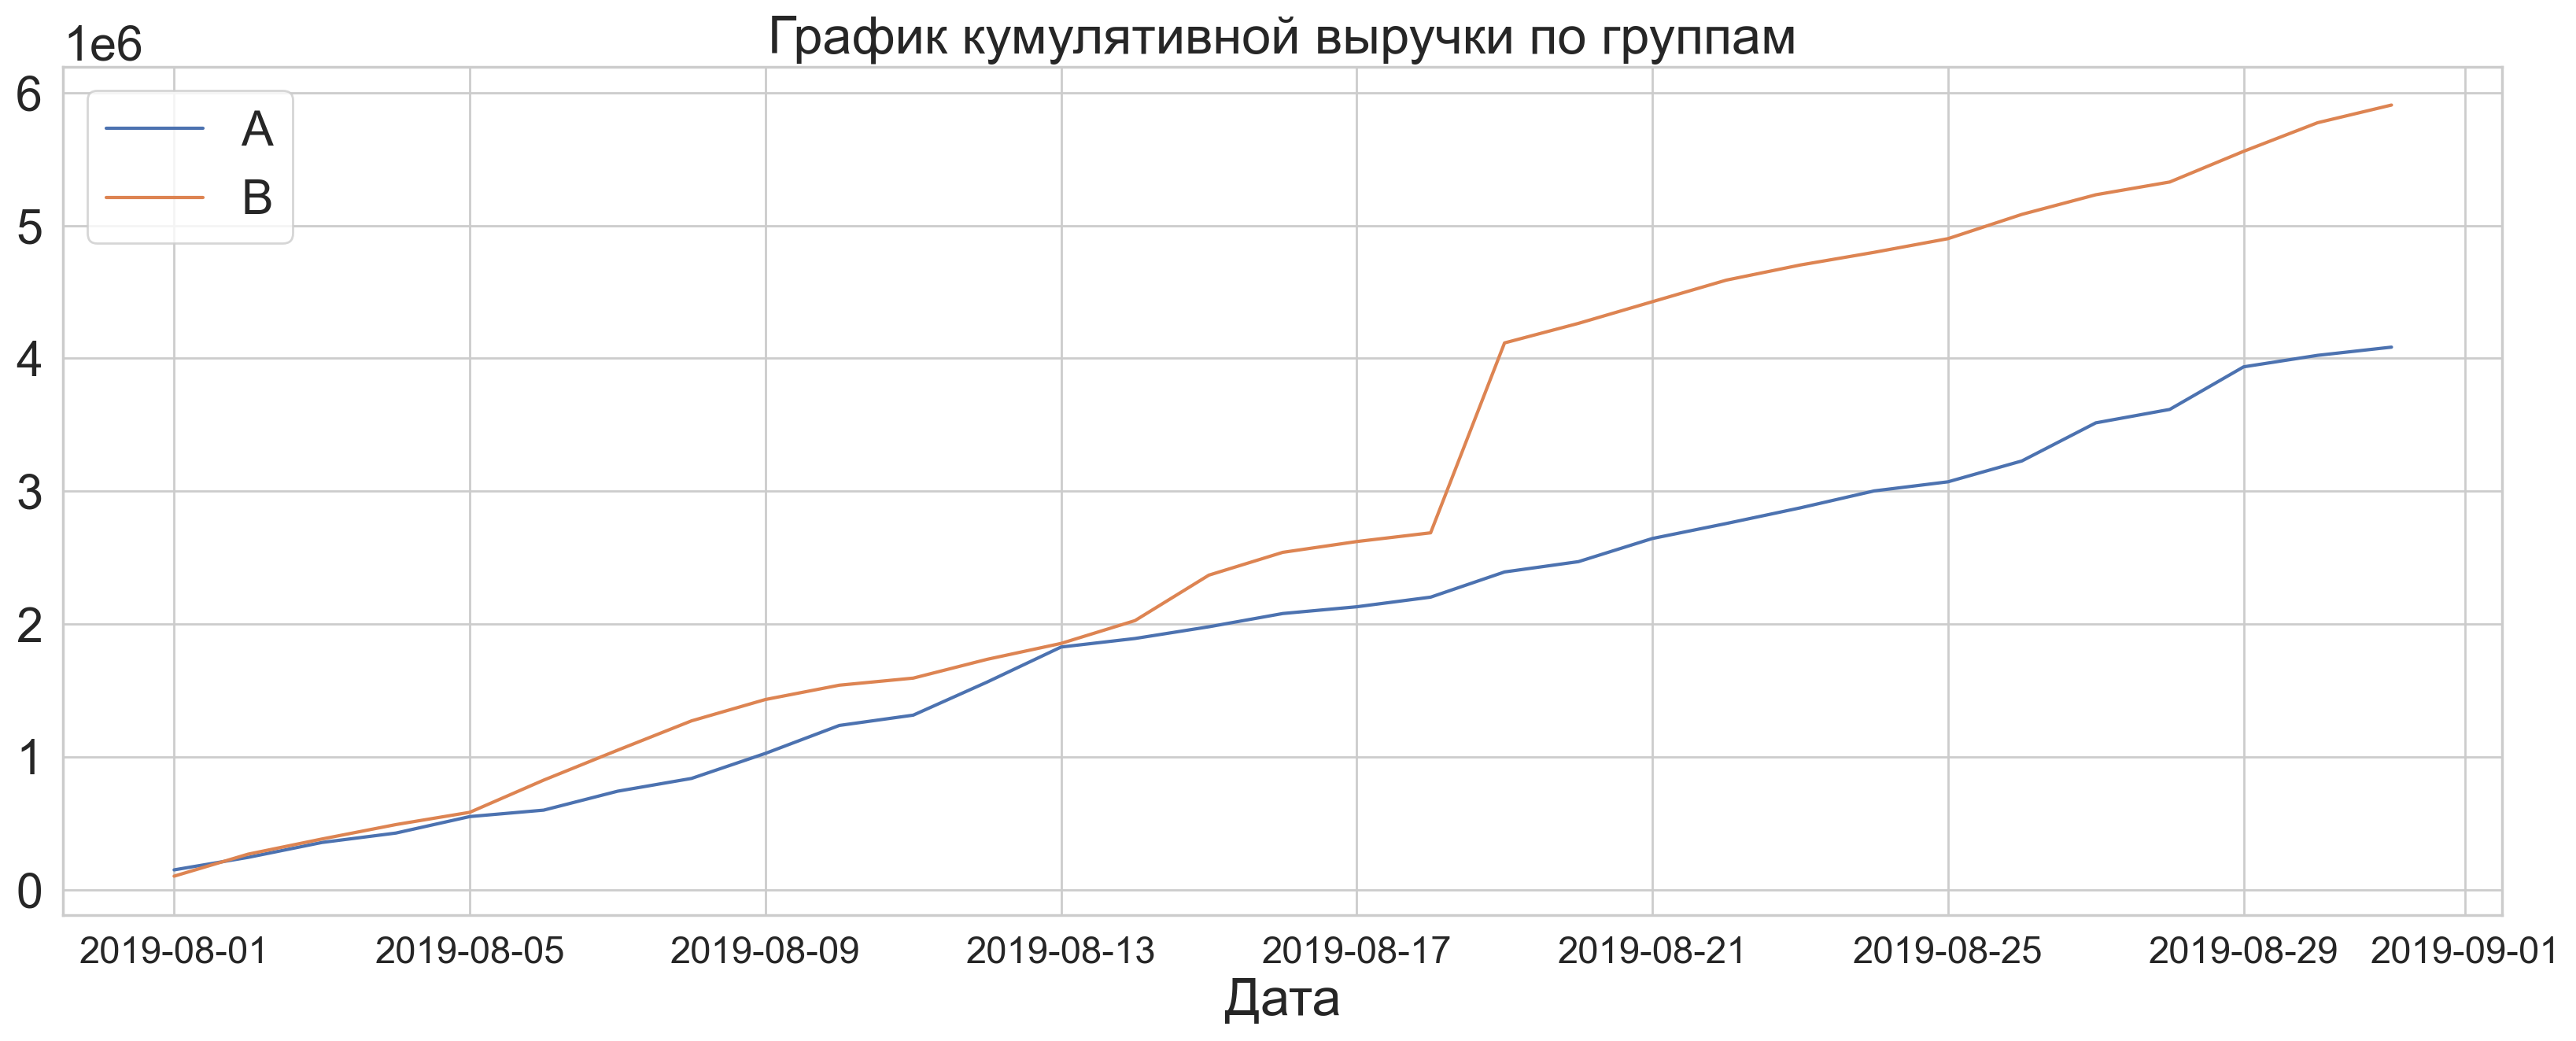

In [21]:
# построим график кумулятивной выручки по группам
# построим график выручки группы А

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# построим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# размер шрифта по оси x

plt.tick_params(axis='x', which='major', labelsize=17)

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.legend();

Лидирует с небольшим отрывом Сегмент В на протяжении практически всего теста, в определенные дни находился на одном уровне с сегментом А. 
С 18 августа выручка у сегмента В имеет резкое колебание вверх, вероятно количество заказов и/или очень дорогих товаров в заказах у данного сегмента значительно возросло. 
Рост выручки сегмента А распределен равномерно на протяжении всего месяца.

### Создание графика кумулятивного среднего чека по группам.

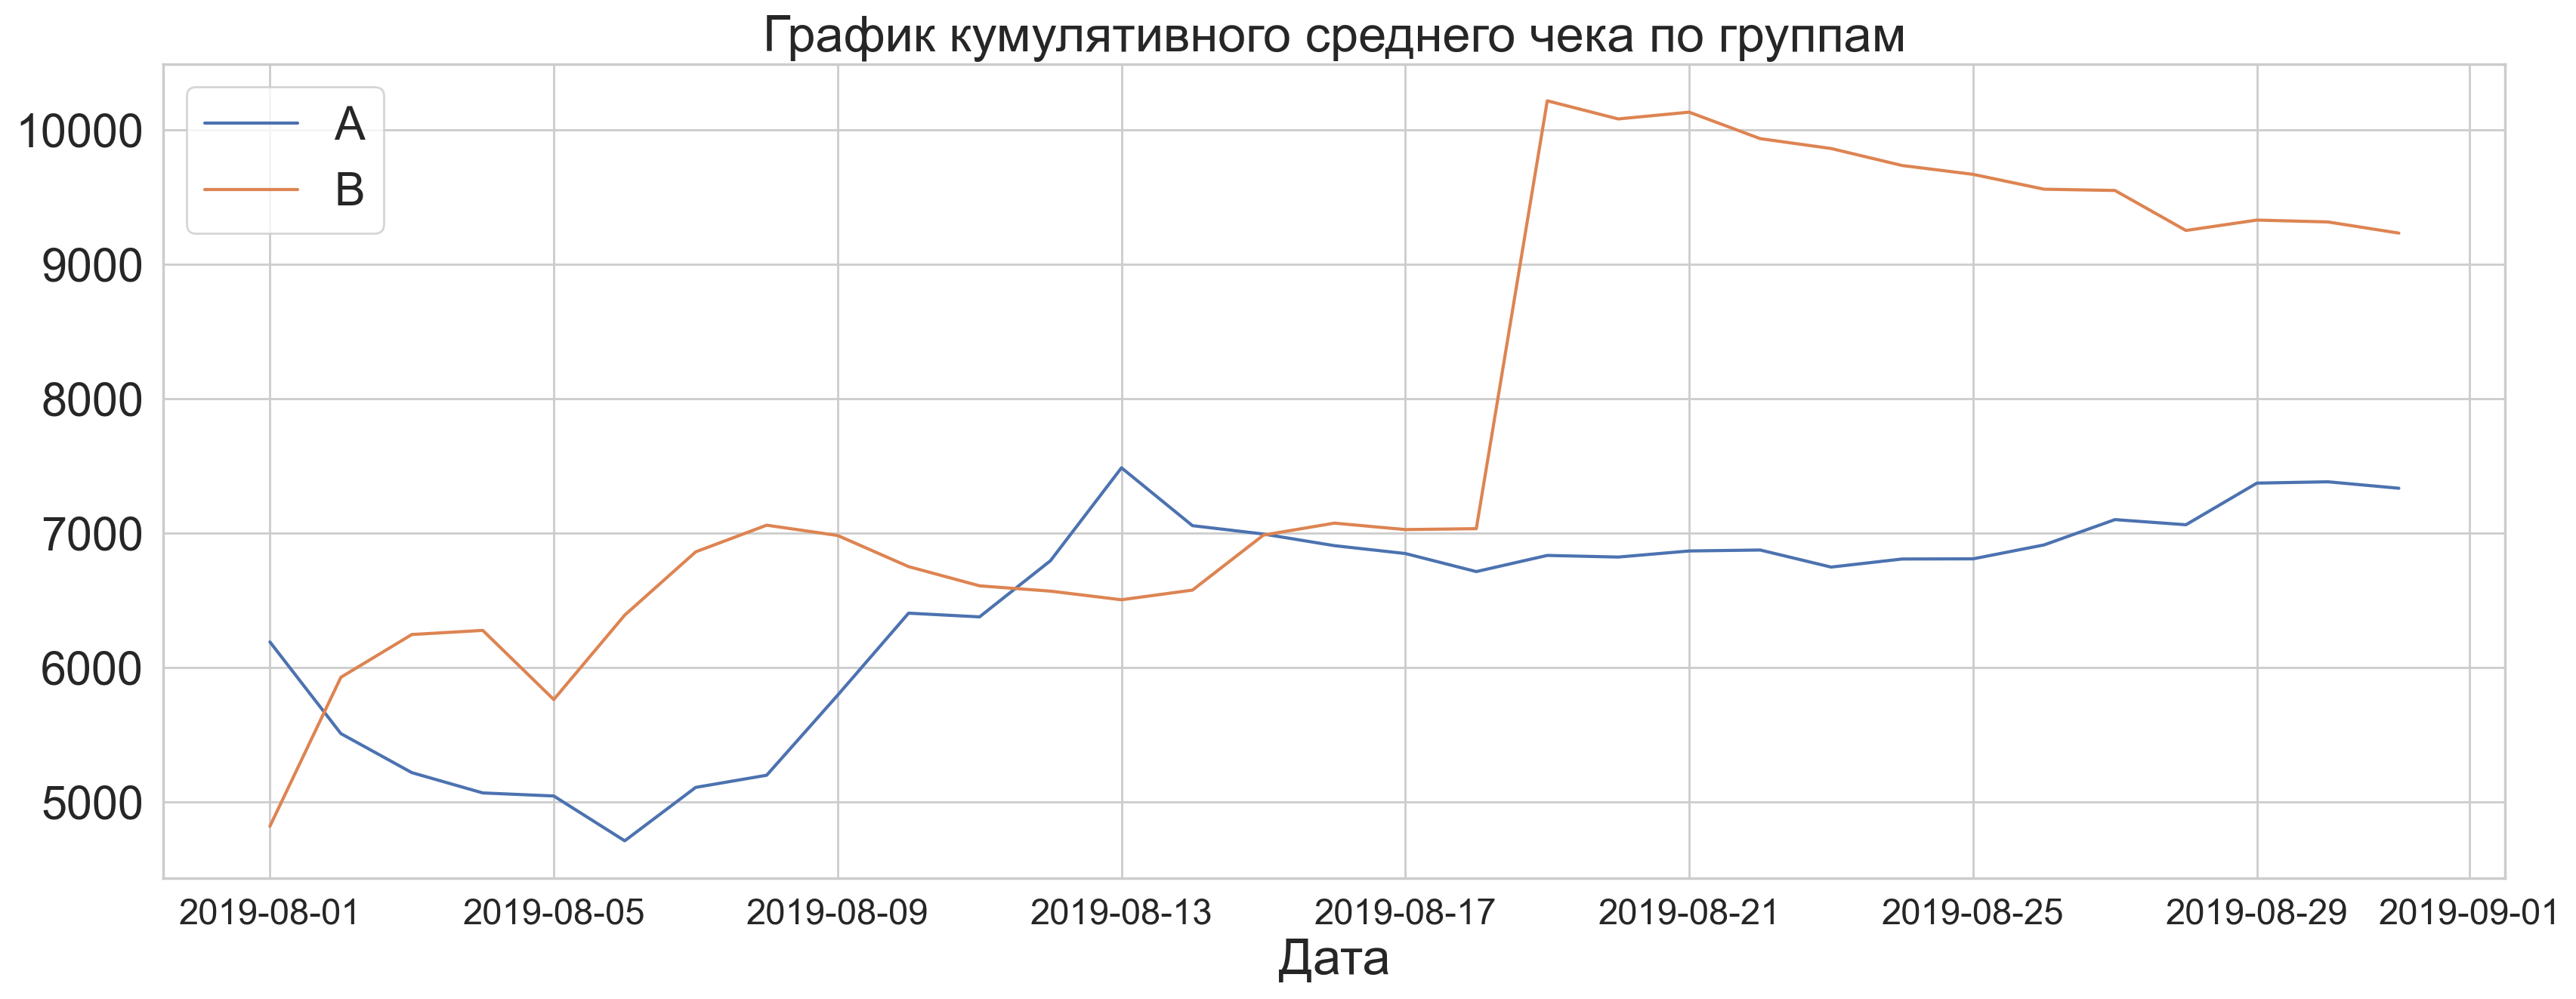

In [22]:
# построим график среднего чека группы А

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# построим график среднего чека группы В

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# зададим размер шрифта по оси x

plt.tick_params(axis='x', which='major', labelsize=17)

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.legend();

Кумулятивное значение среднего чека в середине месяца возросло по обоим сегментам, далее наблюдается снижение. 
В сегменте А, в отличие от сегмента В, ближе к концу месяца средний чек практически прировнялся к максимальным значениям, достигнутым 13 августа. Наблюдаются аномальный рост у сегмента B в период с 18 по 19 августа. Предположительно это могло произойти из за заказов на крупые суммы, что в свою очередь могло повлиять на результаты.

### Создание графика относительного изменения кумулятивного среднего чека группы B к группе A.

Text(0.5, 0, 'Дата')

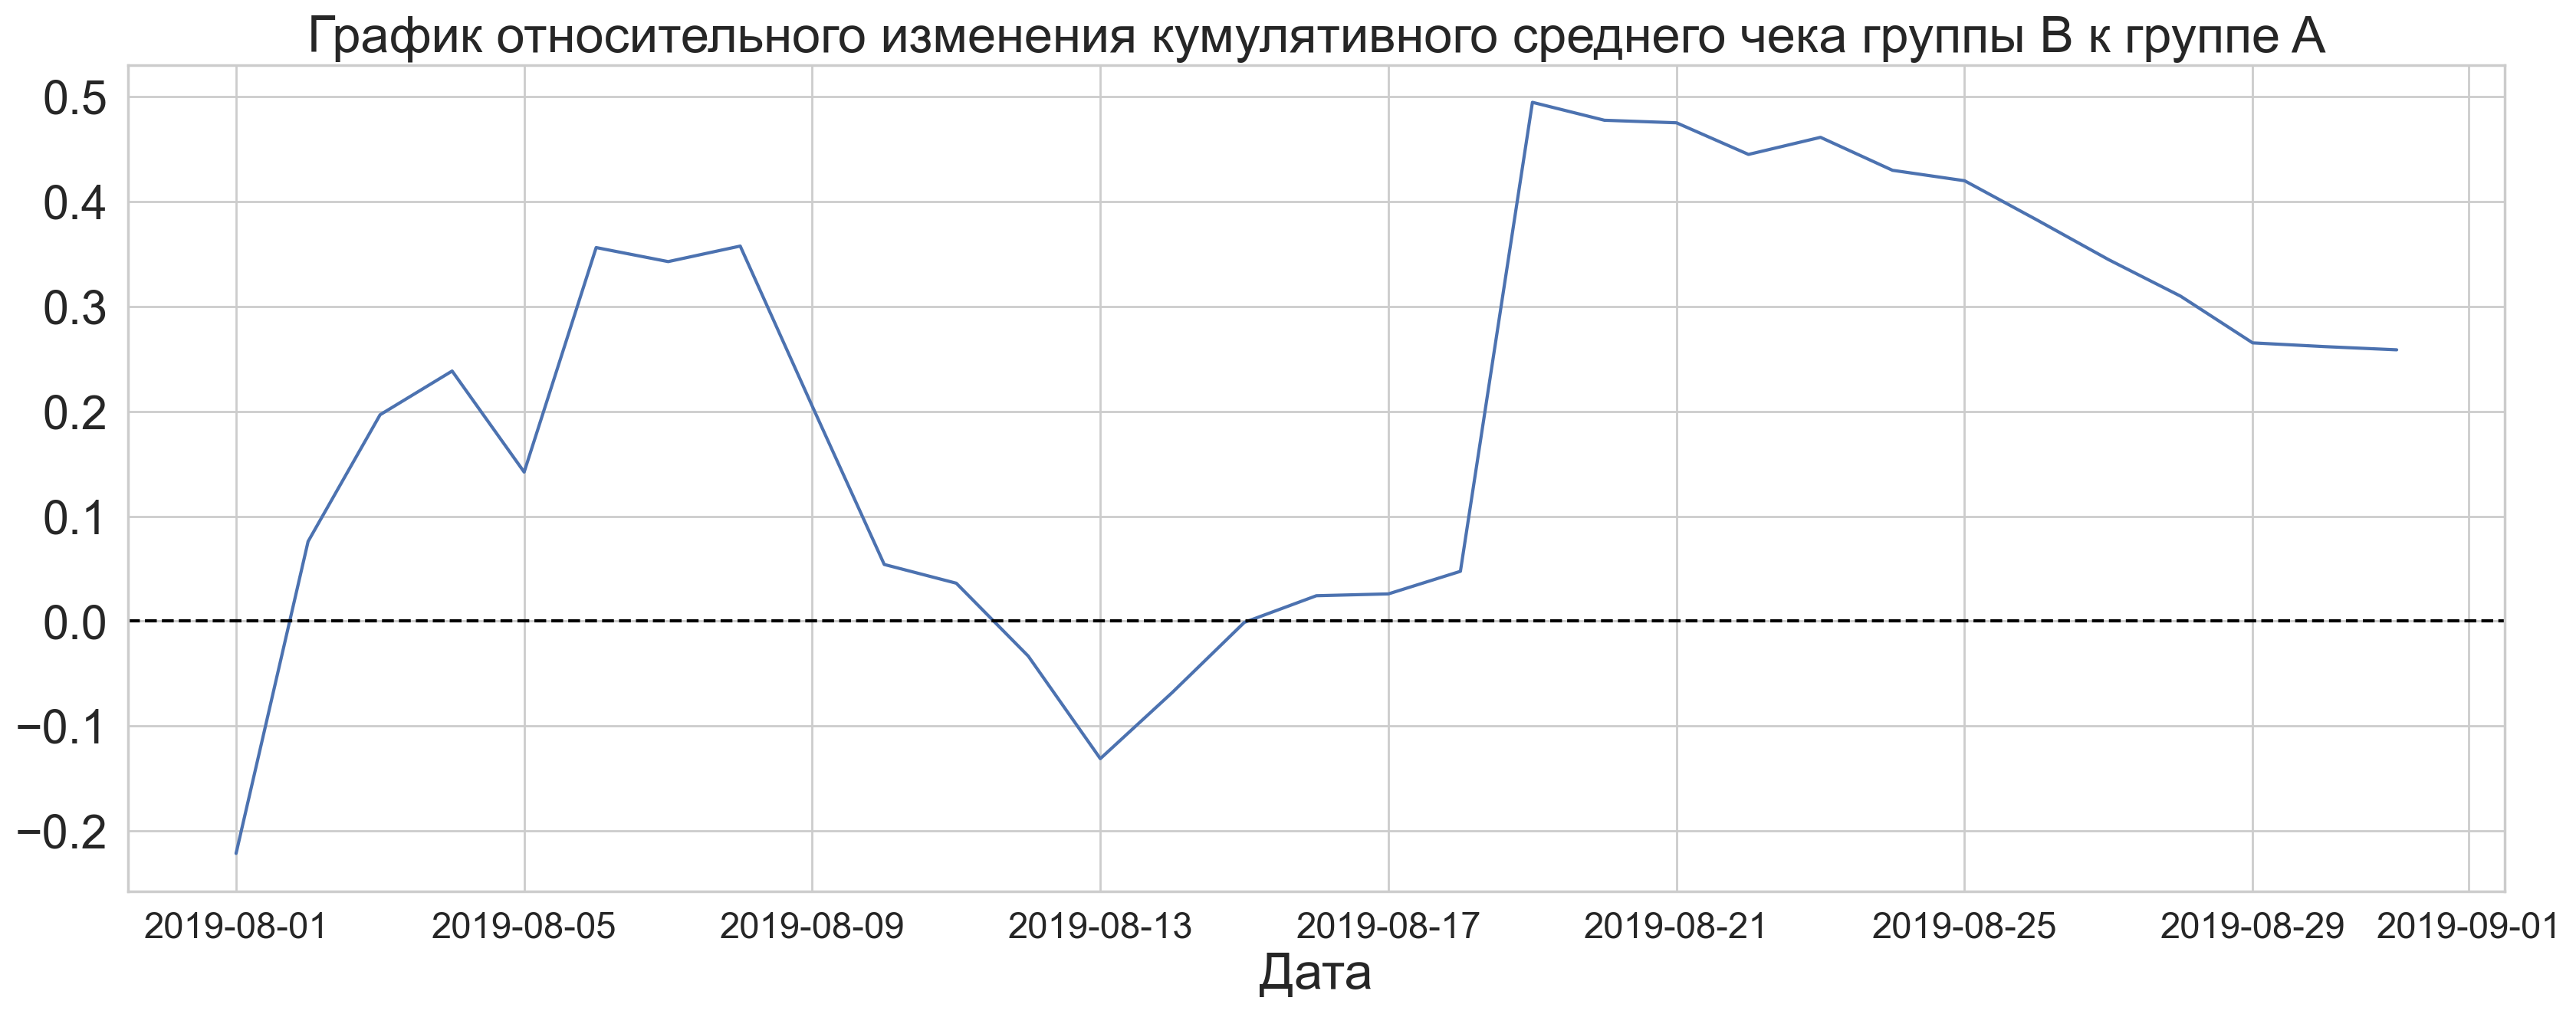

In [23]:
mergedCumulativeRevenue  = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                    left_on='date', 
                                                    right_on='date', 
                                                    how='left', 
                                                    suffixes=['A', 'B'])

# поcтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1);

# добавим ось X

plt.axhline(y=0, color='black', linestyle='--');

# установим размер шрифта по оси x

plt.tick_params(axis='x', which='major', labelsize=17)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')

Наблюдаются значительные колебания в результатах теста. Определенно в одну из дат колебаний были совершены аномальные заказы сегментом В.

### Создание графика кумулятивной конверсии по группам.

Text(0.5, 0, 'Дата')

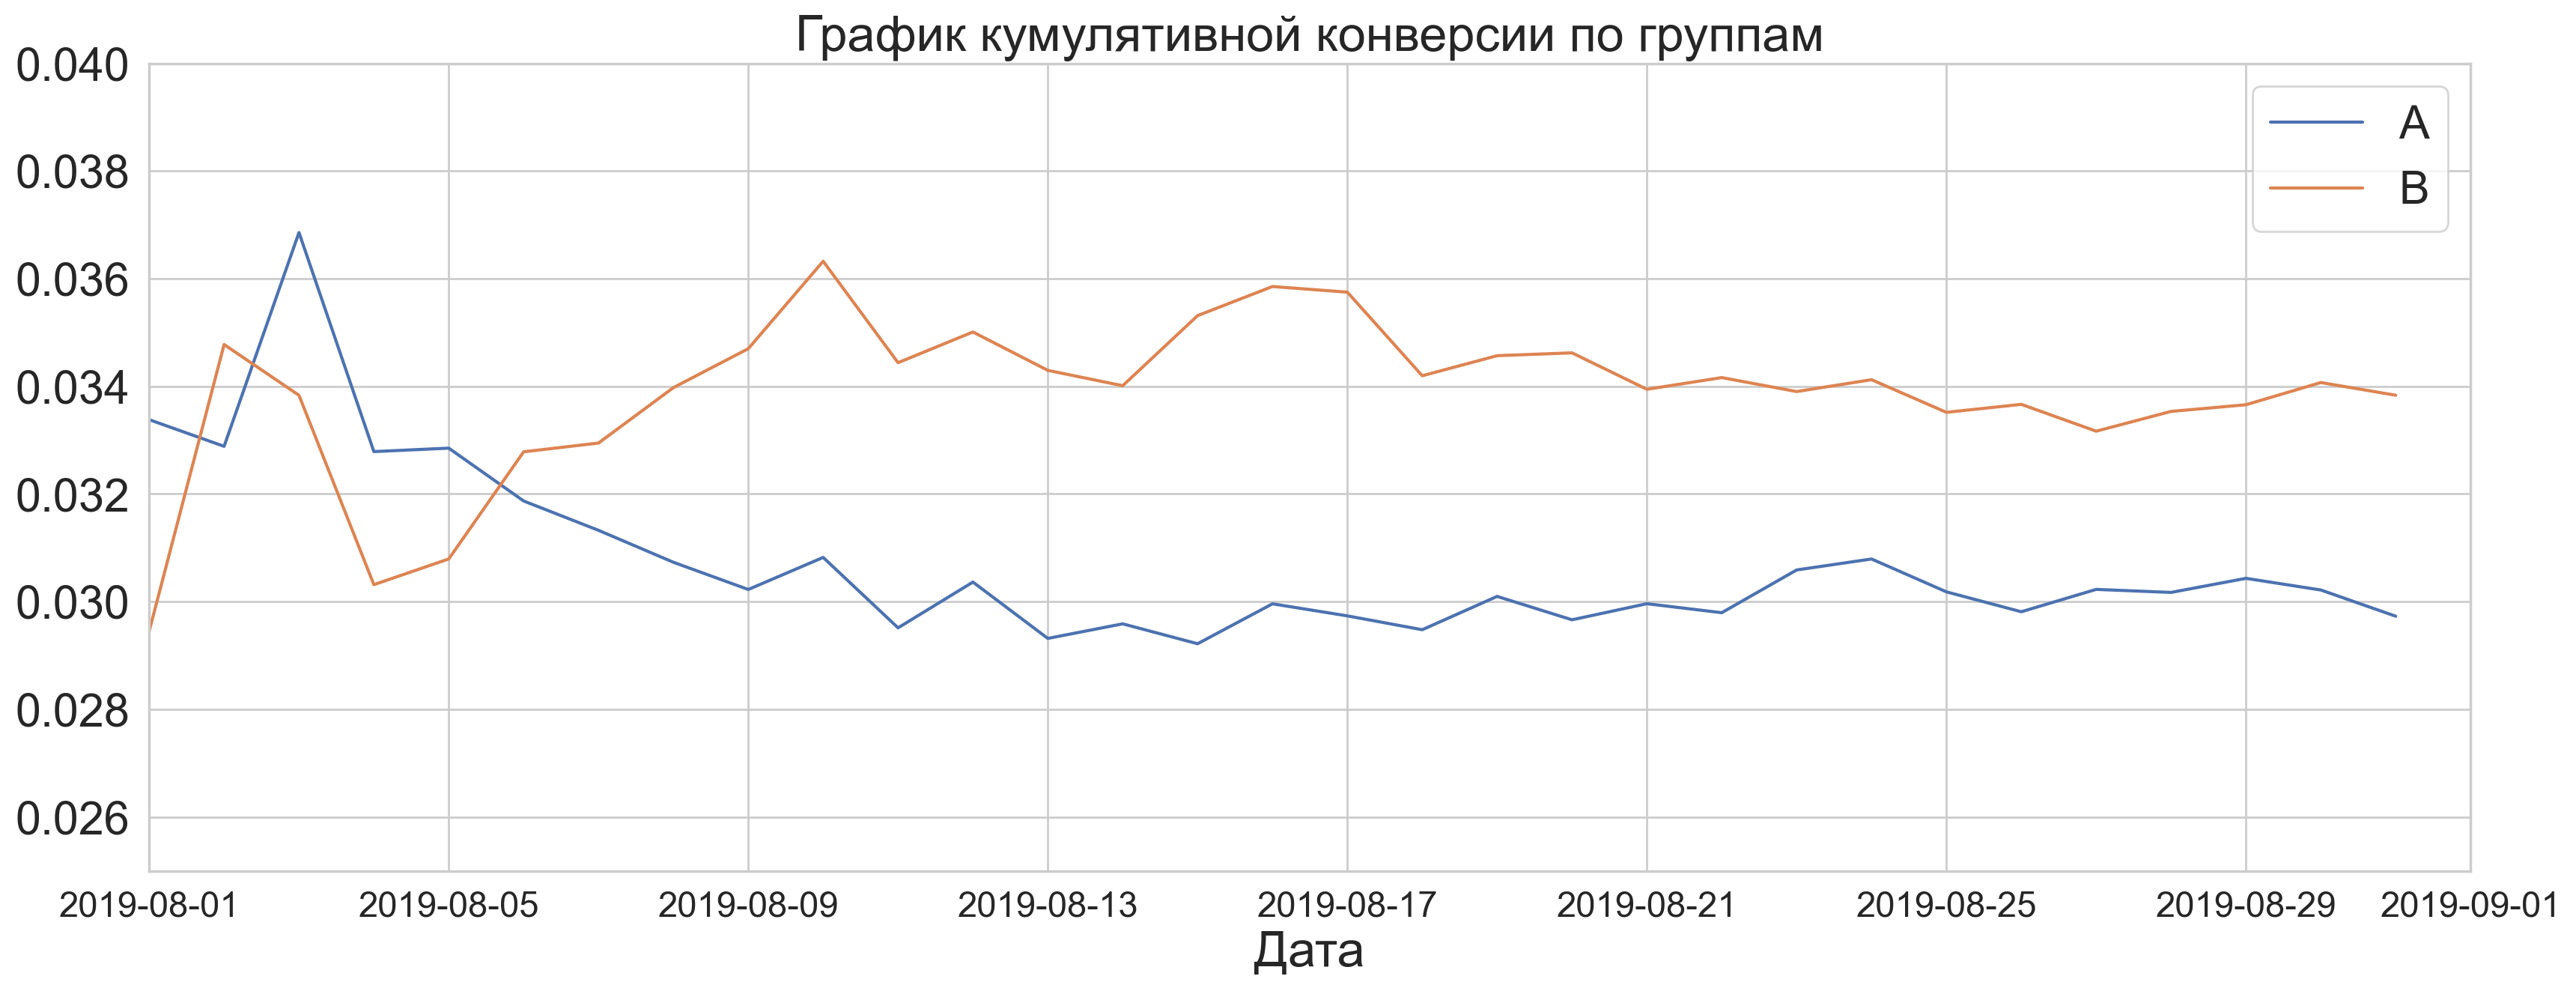

In [24]:
# рассчитаем кумулятивную конверсию

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделим данные по группе A

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделим данные по группе B

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# построим графики

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# установим размер шрифта по оси x

plt.tick_params(axis='x', which='major', labelsize=17)

# зададим масштаб осей

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')

Абсолютное значение колебания варьируется в небольшом диапазоне - приблизительно от 2,9% до 3,7%. 
В начале месяца конверсия у сегмента В была выше сегмента А, но ближе к 10 числам конверсия сегмента В немного выросла, а сегмента А снизилась. К 11 августу конверсия у обоих сегментов зафиксировалась и оставалась примерно на одном уровне до конца месяца. В целом, конверсия у группы В оказалась лучше группы А.

### Создание графика относительного изменения кумулятивной конверсии группы B к группе A.

Text(0.5, 0, 'Дата')

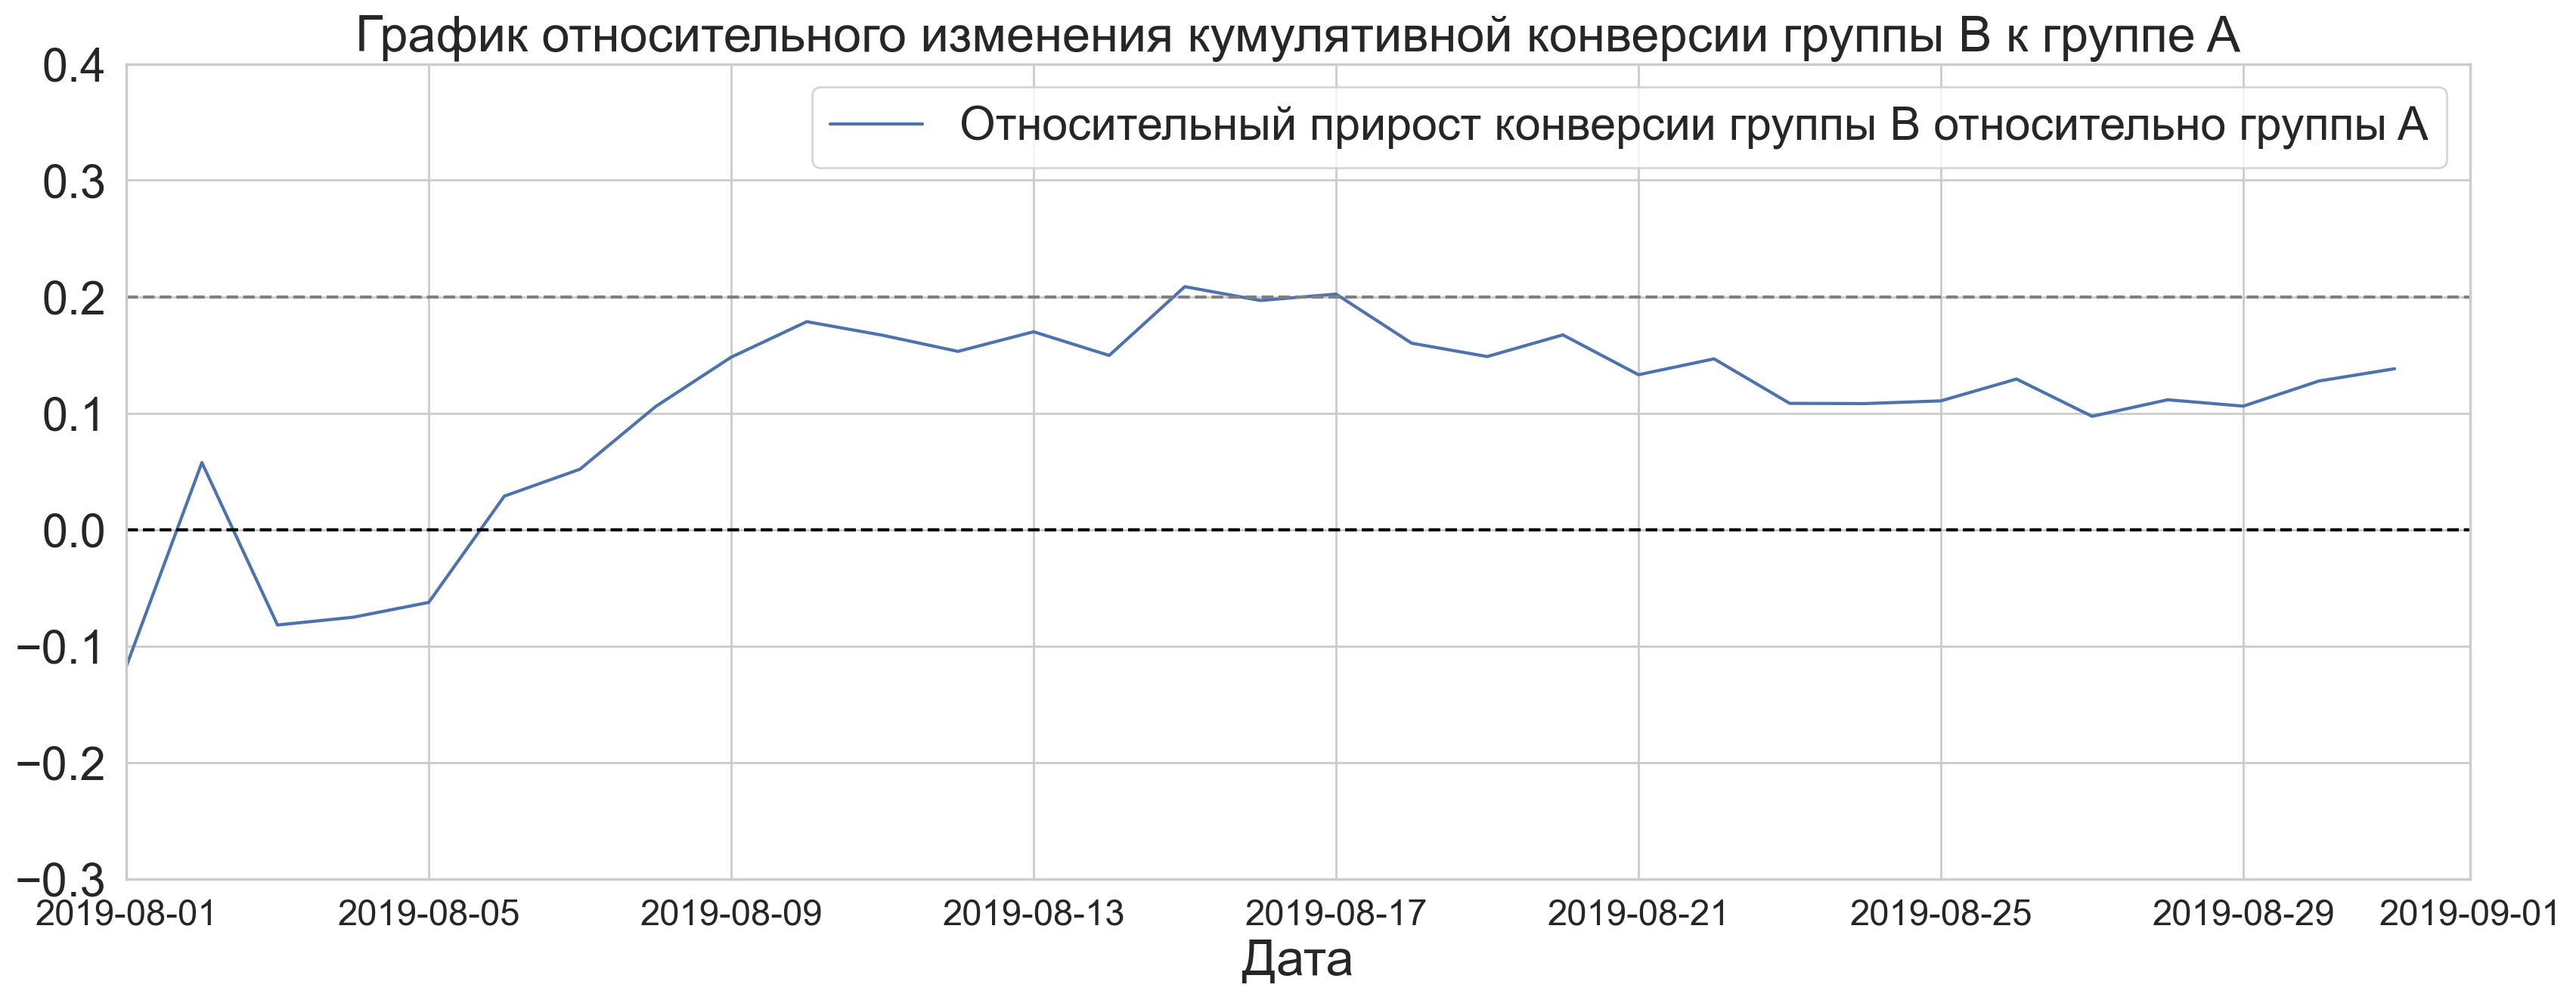

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.4])

# размер шрифта по оси x

plt.tick_params(axis='x', which='major', labelsize=17)

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')

В начале теста группа В уступала группе А, однако с 6 августа вырвалась вперед. Начиная с 8 августа прирост колебался от 10 до 20%, постепенно снижаясь к концу месяца.

### Создание  точечного графика количества заказов по пользователям. 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Text(0, 0.5, 'Количество заказов')

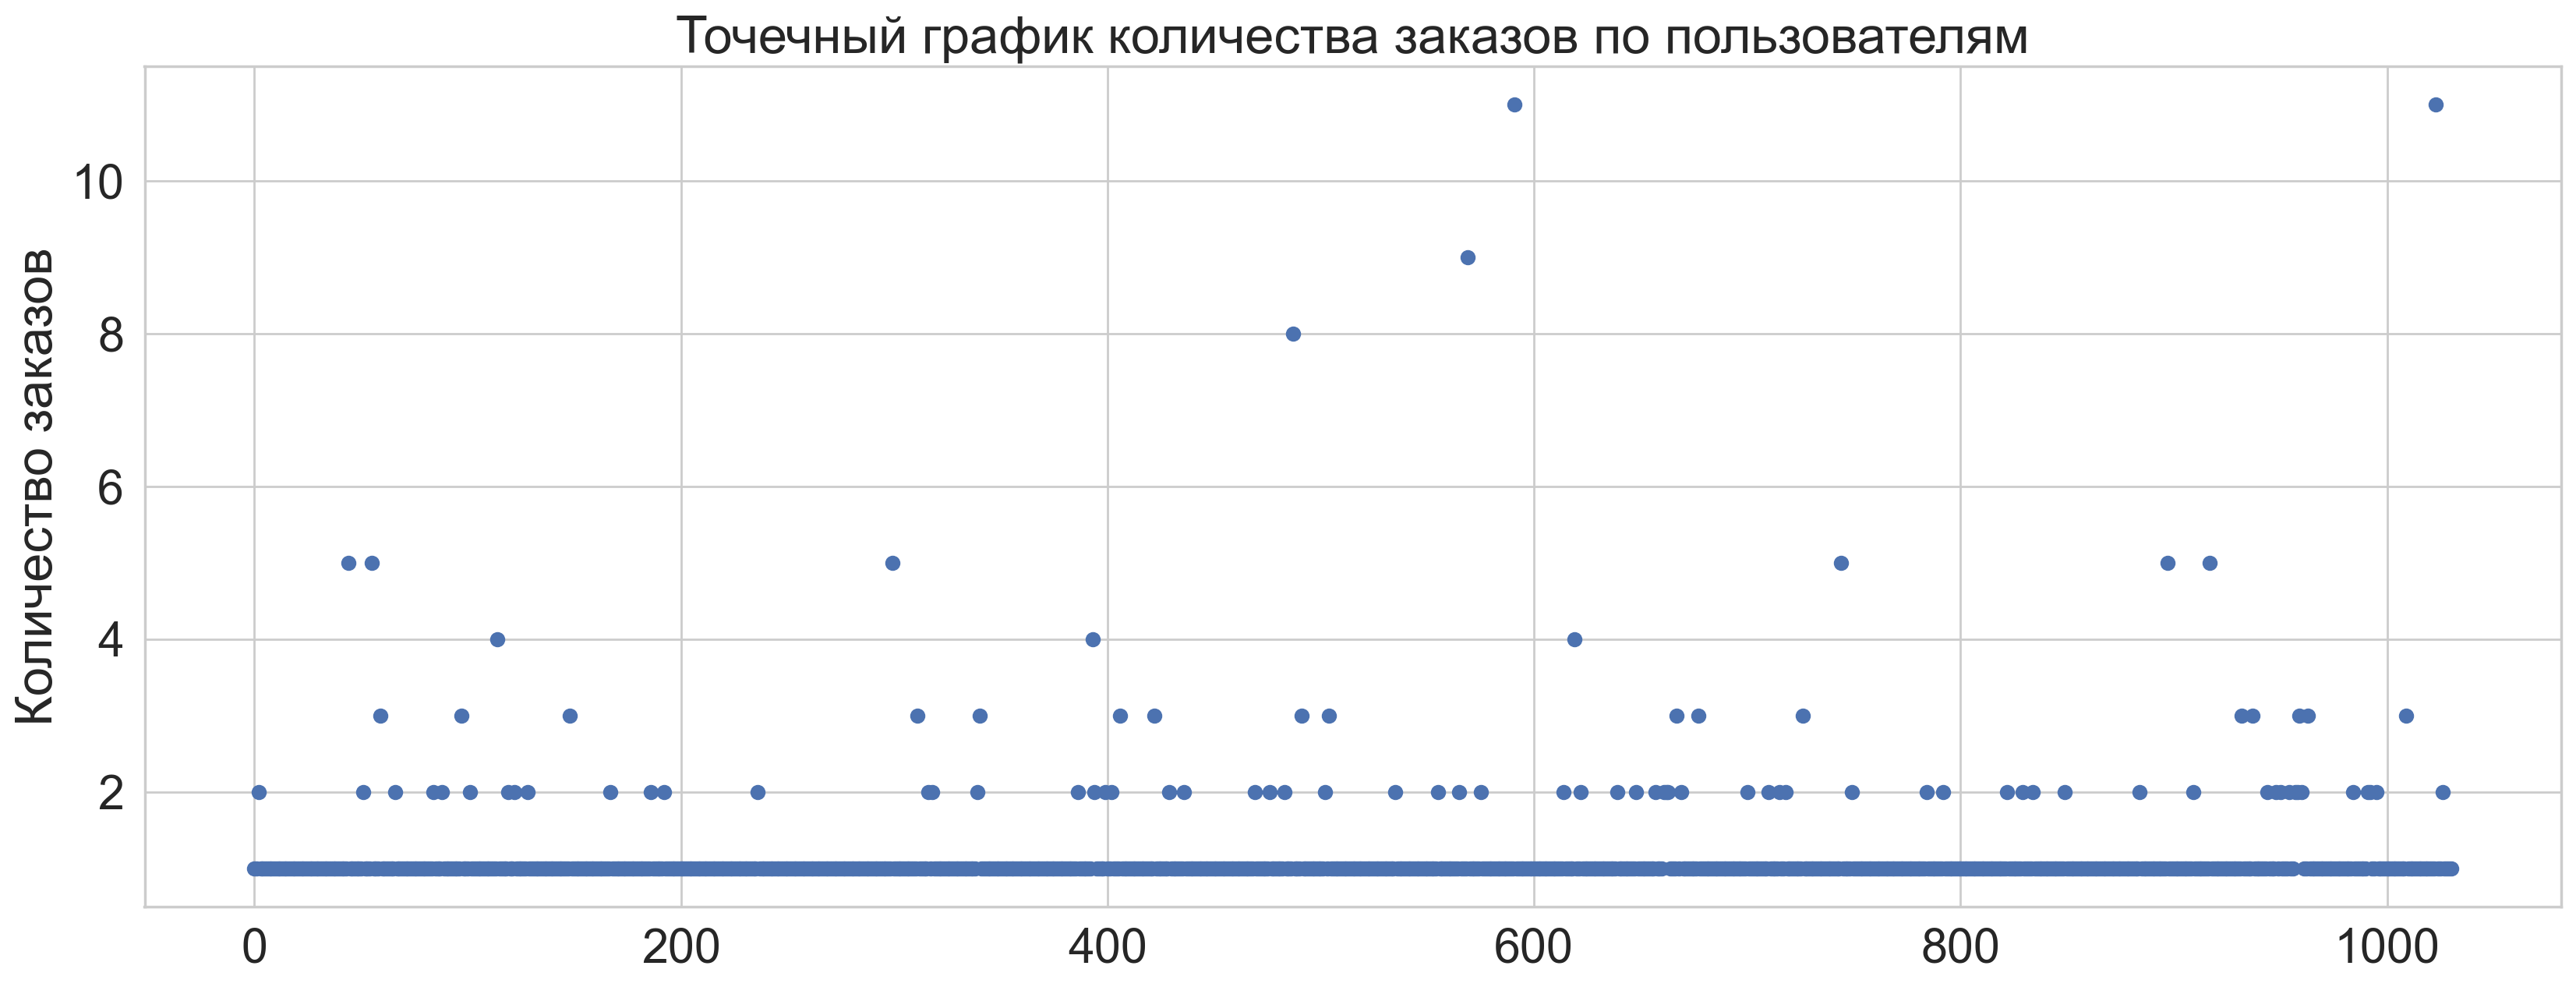

In [26]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')

Количество пользователей, которые сделали более двух заказов крайне мало. Наблюдается определенное количество пользователей сделавших два заказа. 
Для того, чтобы оценить колличество необходимо посчитать выборочные перцентили.

### Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [27]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершали больше двух заказов. 
Не более 1% пользователей - больше 4 заказов. 
Целесообразно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по данному значению. 

### Создание точечныого графика стоимостей заказов.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


Text(0, 0.5, 'Стоимость заказа в млн ед.')

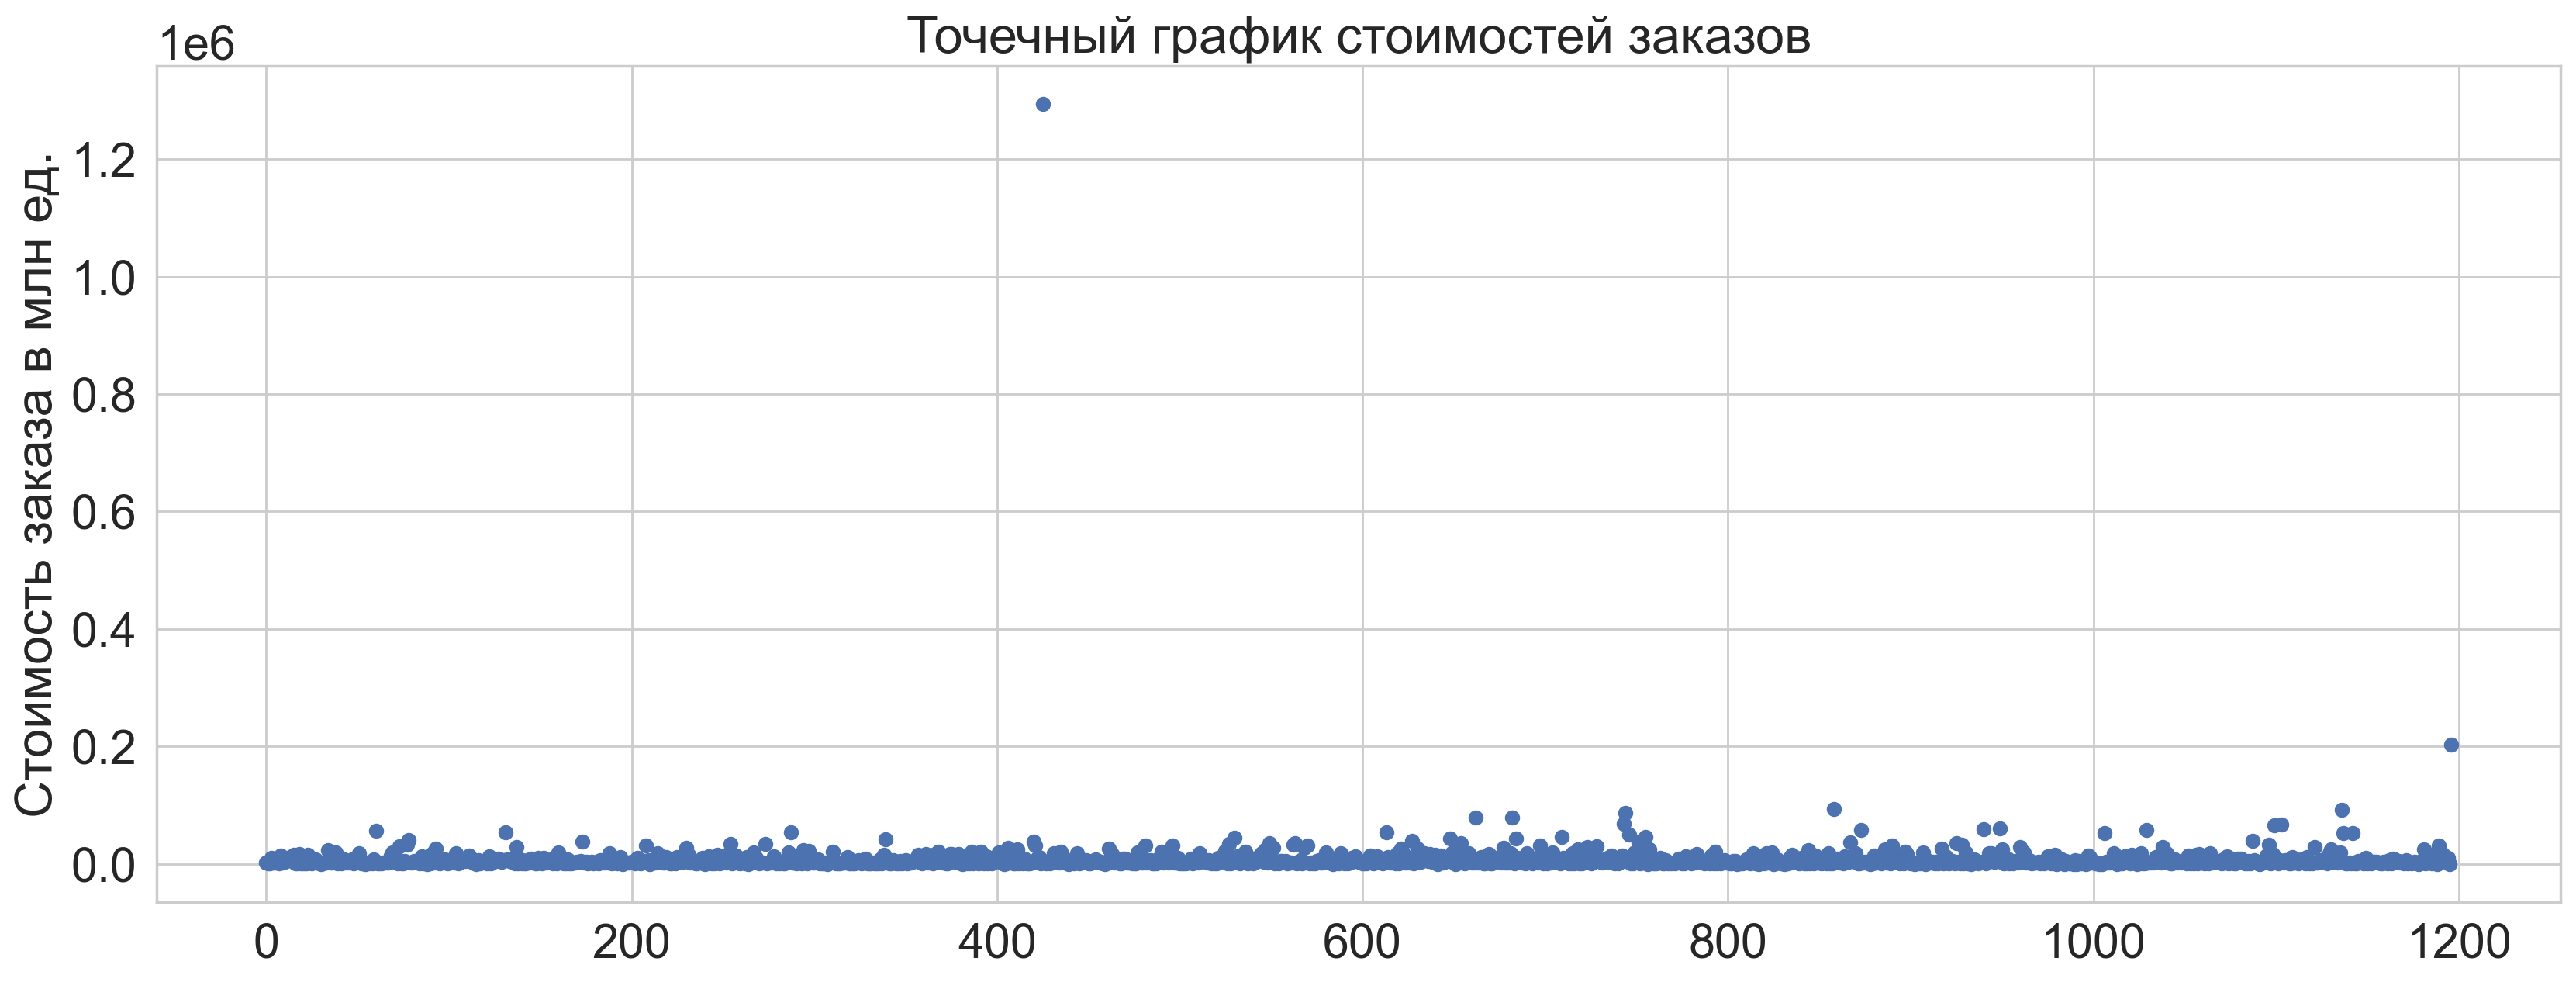

In [28]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн ед.')

Исходя из представленного графика можно сделать вывод что самый крупный заказ был на сумму 1 294 500 ед. 
Данный заказ является аномальным заказом в сравнении с остальными. 
Следующим заказом является заказ в размере 202 740 ед. 
Оставшиеся заказы находятся в диапазаоне ниже 93 940 ед. 

### Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.

In [29]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Менее, чем у 5% пользователей сумма в чеке более 28 тыс. ед. 
Менее, чем у 1% пользователей сумма в чеке более 58 233,2 ед. 
Границей для определения аномальных выберем 28 тыс. ед.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным.

Нулевая гипотеза: различий в конверсии между группами нет. 

Альтернативная гипотеза: различия в конверсии между группами есть. 

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# для пользователей, совершивших хотя бы 1 заказ, будет указано кол-во заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# пользователям с заказами будет соответствовать кол-во заказов пользователя, а пользователям без заказов равны 0

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


Первое число — p-value = 0.01679 меньше 0.05. Можно отвергнуть нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. 
Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [31]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)) 

0.729
0.259


P-value гораздо больше 0,05 - статистически значимых отличий в среднем чеке между группами нет.
Относительное различие среднего чека между сегментами - 25,9%.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным.

In [35]:
# срезы пользователей

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

# срезы пользователей

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01304
0.173


Возьмем за аномальных пользователей тех кто совершил три заказа и более, либо совершил заказ на сумму свыше 28 000 ед. 
Как и в случае с сырыми данными, p-value не превысил 0,05, а значит, нулевую гипотезу можно отвергнуть.
Сегмент В оказался с лучшей конверсией 17,3%, лучше, чем до "очистки" данных.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

In [34]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


P-value оказался приблизительно на таком же уровне - 0,738, как при обработке сырых данных, исходя из этого нулевую гипотезу отвергать нельззя. 
Средний чек сегмента В снизился настолько, что сегмент А стал опережать сегмент В на 2%. 
После "очистки" данных, удаления выбросов разница в среднем чеке между двумя группами сократилась до минимума.

### Вывод.

Данный тест можно остановить и считать успешно проведенным.

Исходя из графиков различия конверсии между группами можно сделать вывод, что результаты группы B более успешны чем группы A и находятся близко к среднему значения.

График различия среднего чека имеет колебания, что в свою очередь свидетельствует о присутствии аномальных значений.

По результатам теста было выявлено статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий, при этом статистически значимых различий по среднему чеку не были зафиксированы в обоих случаях. 

Освовываясь на обнаруженных фактах, можно зафиксировать победу группы В, у которой результаты по конверсии оказались лучше группы А на 13,8% до "очистки" и 17,3% после "очистки" данных.